# Predict of Car Selling_Price- Machine Learning- 
# Linear Regression

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')
data= pd.read_csv('E:\Momeni-Machne Learning class momeni 21 01 1402\Machine Learning\dataset/cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [76]:
# Showing the first ten data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [77]:
# showing rows & columns 
data.shape


(301, 9)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [79]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [80]:
# missing values
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# PreProcessing

In [81]:
# Deletting the Car Nme column
# Question: cost of this car? 
# present price: 11.23 
# KMS Driven: 42000
# fuel type= Petrol
# Seller type: Dealer
# Transmission= Manual
# Owner= 1    Age= 10
# Price= ? 
# Age = max year-year 

In [82]:
data['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [83]:
# we delet column 'year', and add age of car
np.max(data['Year'])

2018

In [84]:
data['Age']=2019-data['Year']
data.drop('Year',axis=1,inplace=True)
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


# Type of Columns

# Categorical

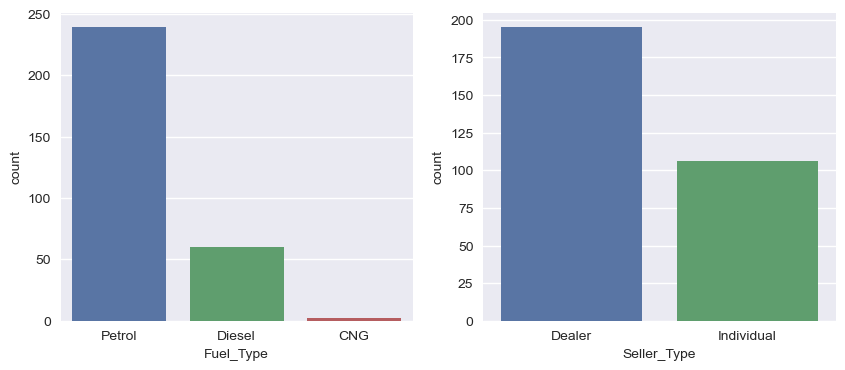

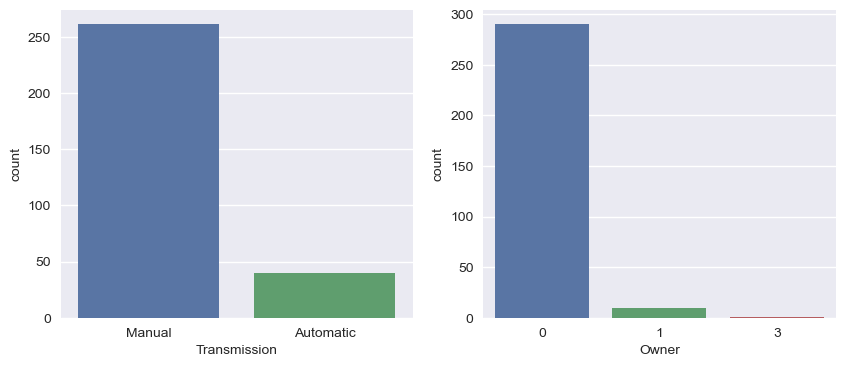

In [85]:
Categorical= ['Fuel_Type','Seller_Type','Transmission','Owner']
i=0
while i<4:
    fig=plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=Categorical[i],data=data)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=Categorical[i],data=data)
    i += 1
    plt.show()

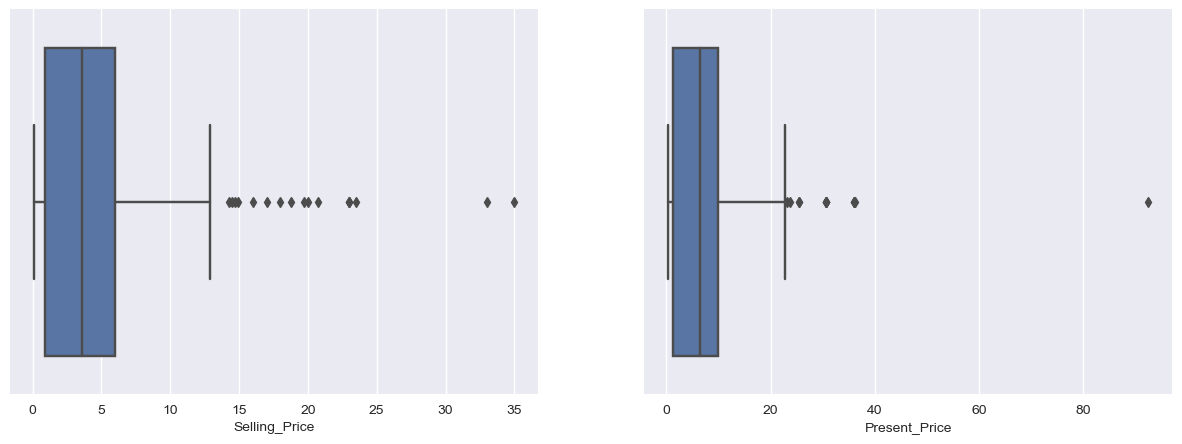

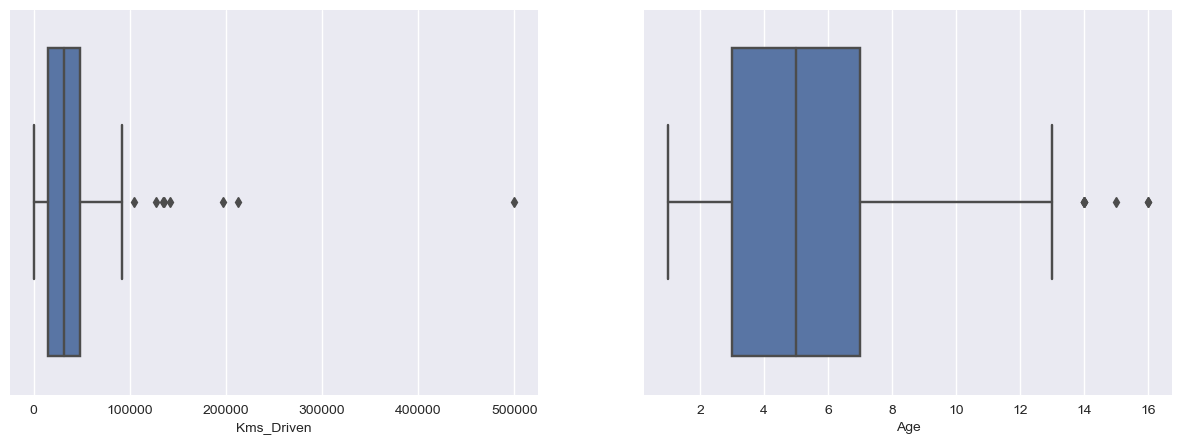

In [86]:
Numerical= ['Selling_Price','Present_Price','Kms_Driven','Age']
i=0
while i<4:
    fig=plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i],data=data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i],data=data)
    i += 1
    plt.show()

In [87]:
# correlation
# Just on columns which are intiger   
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [88]:
# This code shows the data name in each categorical column 
print(pd.unique(data['Fuel_Type']))
print(pd.unique(data['Seller_Type']))
print(pd.unique(data['Transmission']))
print(pd.unique(data['Owner']))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [89]:
# we replace the numerical data with integer
# We can't use 0,1 in replace code
data['Fuel_Type'].replace({'Petrol':2,'Diesel':3,'CNG':4},inplace=True)
data['Seller_Type'].replace({'Dealer':2,'Individual':3},inplace=True)
data['Transmission'].replace({'Manual':2,'Automatic':3},inplace=True)
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [90]:
# we donot need Car_Name column
data.drop(labels='Car_Name',axis=1,inplace=True)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


# Creat model

In [91]:
# Seperating target variable and features
x= data.drop('Selling_Price',axis=1)
y=data['Selling_Price']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print('x train: ', x_train.shape)
print('x test: ',x_test.shape)
print('y train: ',y_train.shape)
print('y test: ',y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [94]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [95]:
y_pred=model.predict(x_test)


In [96]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))      

Mean Absolute Error:  1.1530045916158915
Mean Squared Error:  3.287646085715837
Root Mean Squared Error:  1.8131867211392867
R2 Score:  0.848454941209038


# improve Model

In [97]:
k_fold = KFold(10)
print(cross_val_score(model,x,y.ravel(),cv=k_fold,n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [ ]:
# We found that in 3 section cross_validation score is negative
# so we delet3 them 

In [98]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [99]:
len(data)/10

30.1

In [100]:
data1= data[data.index<120]
data2= data[data.index>210]
data3=data1.append(data2)
data3.reset_index(drop=True,inplace=True)
data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [101]:
x2= data3.drop('Selling_Price',axis=1)
y2=data3['Selling_Price']

In [102]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2, random_state=1)

In [103]:
model2=LinearRegression()
model2.fit(x_train2,y_train2)


LinearRegression()

In [104]:
y_pred2=model2.predict(x_test2)

In [105]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test2,y_pred2))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test2,y_pred2))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))
print('R2 Score: ', metrics.r2_score(y_test2,y_pred2))   

Mean Absolute Error:  1.2344068697754256
Mean Squared Error:  2.623898258077045
Root Mean Squared Error:  1.6198451339794941
R2 Score:  0.8793462370195


# R2_score(2)=0.88 > R2_score(1) =0.84

In [106]:
print('Model Intercept =',model2.intercept_)
print('Model Coefs =',model2.coef_)

Model Intercept = -1.696235044202953
Model Coefs = [ 4.42320455e-01 -2.66901271e-05  2.25919515e+00 -1.26225774e+00
  2.10515821e+00 -1.13003710e+00 -4.62552614e-01]


In [107]:
# We enter the data into the model to get the output
y_pred2=model2.predict([[11.23,42000,1,4,6,1,10]])
y_pred2

array([6.23558857])

# check out noises

In [108]:
print(pd.unique(data['Fuel_Type']))
print(pd.unique(data['Seller_Type']))
print(pd.unique(data['Transmission']))
print(pd.unique(data['Owner']))

[2 3 4]
[2 3]
[2 3]
[0 1 3]


# There is not any noise here!

# But for Numerical features..
# selling price <30
# Present price<80
# KMS Driven < 400000
# Noise? No way, All okay 

# lets creat our model

# simple one

In [109]:
x= pd.DataFrame(data,columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Age'])
y= data.Selling_Price.values.reshape(-1,1)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2= metrics.r2_score(y_test,y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score: ', r2)     


Mean Absolute Error:  1.0000326012144776
Mean Squared Error:  2.188556445657228
Root Mean Squared Error:  1.4793770464818048
R2 Score:  0.9134181721224689


# seems good! 91% Acc.
# But Can we Improve our model?
# Lets try
# Trying to make non linear features 
# Dimension= X^2

In [111]:
# making function 
def check(Dimension,testsize):
    r2= 0.9134181721224689
    for column in x:
        New_Col_Name = column + str(Dimension)
        New_Col_Val= x[column]**Dimension
        x.insert(0, New_Col_Name, New_Col_Val)
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=testsize,random_state=0)
        New_Model=LinearRegression()
        New_Model.fit(x_train,y_train)
        y_pred = New_Model.predict(x_test)
        r2_new= metrics.r2_score(y_test,y_pred)
        if r2_new < r2:
            x.drop([New_Col_Name],axis=1,inplace=True)
        else:
            r2=r2_new
    print('R2 score:', r2)
    
check(2,0.2)

R2 score: 0.9311515326441929


In [112]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


# Well Done! +2% 
# Higher Dimensions didnot change the score
# Another way: DotProduct features 
# Dont use loop for this part if you have limited features! 

In [113]:
# the biggest correlation was for Present Price 
# so we enter following features that were effective in the past section 
# to improve our model 


In [114]:
pres_kms=x['Present_Price']*x['Kms_Driven']
pres_kms2=x['Present_Price']*x['Kms_Driven2']
pres_Fuel=x['Present_Price']*x['Fuel_Type']
pres_Fuel2=x['Present_Price']*x['Fuel_Type2']
pres2_kms=x['Present_Price2']*x['Kms_Driven']
pres2_kms2=x['Present_Price2']*x['Kms_Driven2']
pres2_Fuel=x['Present_Price2']*x['Fuel_Type']
pres2_Fuel2=x['Present_Price2']*x['Fuel_Type2']

In [115]:
x.insert(0,'pres_kms',pres_kms)
x.insert(0,'pres_kms2',pres_kms2)
x.insert(0,'pres_Fuel',pres_Fuel)
x.insert(0,'pres_Fuel2',pres_Fuel2)
x.insert(0,'pres2_kms',pres2_kms)
x.insert(0,'pres2_kms2',pres2_kms2)
x.insert(0,'pres2_Fuel',pres2_Fuel)
x.insert(0,'pres2_Fuel2',pres2_Fuel2)

In [116]:
x

,pres2_Fuel2,pres2_Fuel,pres2_kms2,pres2_kms,pres_Fuel2,pres_Fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2= metrics.r2_score(y_test,y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score: ', r2)   

Mean Absolute Error:  0.7263874110386819
Mean Squared Error:  1.19274445954215
Root Mean Squared Error:  1.0921284079915465
R2 Score:  0.9528136476886959


# 0.95!  Nice?!
# Now lets try K-Fold 

In [118]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=4)
results= (cross_val_score(model, x, y, cv=k_fold, n_jobs=-1))
print(results)
print(np.mean(results))

[ 0.94787814  0.93375237 -2.09888779  0.86452195]
0.16181616717715522


#  what؟ Third fold is bad in training!!!

In [119]:
x.shape

(301, 19)

In [120]:
301/6

50.166666666666664

In [121]:
df=x[x.index<100]
df2=x[x.index>151]
x_new=df.append(df2)
x_new.reset_index(drop=True, inplace=True)
x_new

,pres2_Fuel2,pres2_Fuel,pres2_kms2,pres2_kms,pres_Fuel2,pres_Fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [122]:
y= data['Selling_Price']
y1=y[y.index<100]
y2=y[y.index>151]
y_new=y1.append(y2)
y_new.reset_index(drop=True,inplace=True)
y_new.shape

(249,)

In [123]:
x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new,y_new,test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_new_train,y_new_train)
y_new_pred=model.predict(x_new_test)
r2= metrics.r2_score(y_new_test,y_new_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_new_test,y_new_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_new_test,y_new_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_new_test,y_new_pred)))
print('R2 Score: ', r2)   

Mean Absolute Error:  0.6748046027859192
Mean Squared Error:  0.8403528849999863
Root Mean Squared Error:  0.9167076333269982
R2 Score:  0.9771368926209409


# almost %98 
# now lets try Normalization 

In [124]:
from sklearn import preprocessing
print (x_new[0:5])
x_new.insert(0,'Target',y_new)
DataFrame=x_new
DataFrame
Scaler=preprocessing.StandardScaler().fit(DataFrame)
Norm=Scaler.transform(DataFrame.astype(float))
print(Norm[0:5])

   pres2_Fuel2  pres2_Fuel    pres2_kms2    pres2_kms  pres_Fuel2  pres_Fuel  \
0     124.9924     62.4962  2.277986e+10   843698.700       22.36      11.18   
1     819.1044    273.0348  1.682804e+11  3913498.800       85.86      28.62   
2     388.0900    194.0450  4.619241e+09   669455.250       39.40      19.70   
3      68.8900     34.4450  4.656964e+08    89557.000       16.60       8.30   
4     424.7721    141.5907  8.504893e+10  2003508.405       61.83      20.61   

      pres_kms2  pres_kms  Owner2  Fuel_Type2  Kms_Driven2  Present_Price2  \
0  4.075110e+09  150930.0       0           4    729000000         31.2481   
1  1.763946e+10  410220.0       0           9   1849000000         91.0116   
2  4.689585e+08   67965.0       0           4     47610000         97.0225   
3  1.122160e+08   21580.0       0           4     27040000         17.2225   
4  1.237976e+10  291631.5       0           9   1802002500         47.1969   

   Present_Price  Kms_Driven  Fuel_Type  Seller_Ty

In [125]:
x_norm=DataFrame.drop(['Target'],axis=1)
y_norm=DataFrame['Target'].values.reshape(-1,1)

In [126]:
x_norm_train,x_norm_test,y_norm_train,y_norm_test = train_test_split(x_norm,y_norm,test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_norm_train,y_norm_train)
y_norm_pred=model.predict(x_norm_test)
r2= metrics.r2_score(y_norm_test,y_norm_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_norm_test,y_norm_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_norm_test,y_norm_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_norm_test,y_norm_pred)))
print('R2 Score: ', r2)   

Mean Absolute Error:  0.6748046027859192
Mean Squared Error:  0.8403528849999863
Root Mean Squared Error:  0.9167076333269982
R2 Score:  0.9771368926209409


# same! Yeap

# Visualization of Model

In [127]:
x_new.drop(['Target'],axis=1,inplace=True)

In [128]:
x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new,y_new,test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_new_train,y_new_train)
y_new_pred=model.predict(x_new_test)
r2= metrics.r2_score(y_new_test,y_new_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_new_test,y_new_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_new_test,y_new_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_new_test,y_new_pred)))
print('R2 Score: ', r2)   

Mean Absolute Error:  0.6748046027859192
Mean Squared Error:  0.8403528849999863
Root Mean Squared Error:  0.9167076333269982
R2 Score:  0.9771368926209409


In [129]:
x_new_test

,pres2_Fuel2,pres2_Fuel,pres2_kms2,pres2_kms,pres_Fuel2,pres_Fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [130]:
x_new_test.insert(0,'y_new_test',y_new_test)
x_new_test.insert(0,'y_new_pred',y_new_pred)
x_new_test

,y_new_pred,y_new_test,pres2_Fuel2,pres2_Fuel,pres2_kms2,pres2_kms,pres_Fuel2,pres_Fuel,pres_kms2,pres_kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.048428,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,...,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.905996,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,...,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.338845,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,...,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.209439,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,...,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.527123,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,...,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.813596,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,...,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.412345,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,...,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.395945,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,...,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.807709,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,...,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.978569,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,...,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [131]:
New_def = x_new_test.sort_values(by='Present_Price')


In [132]:
a=New_def.Present_Price
b=New_def.y_new_test
c=New_def.Present_Price
d=New_def.y_new_pred

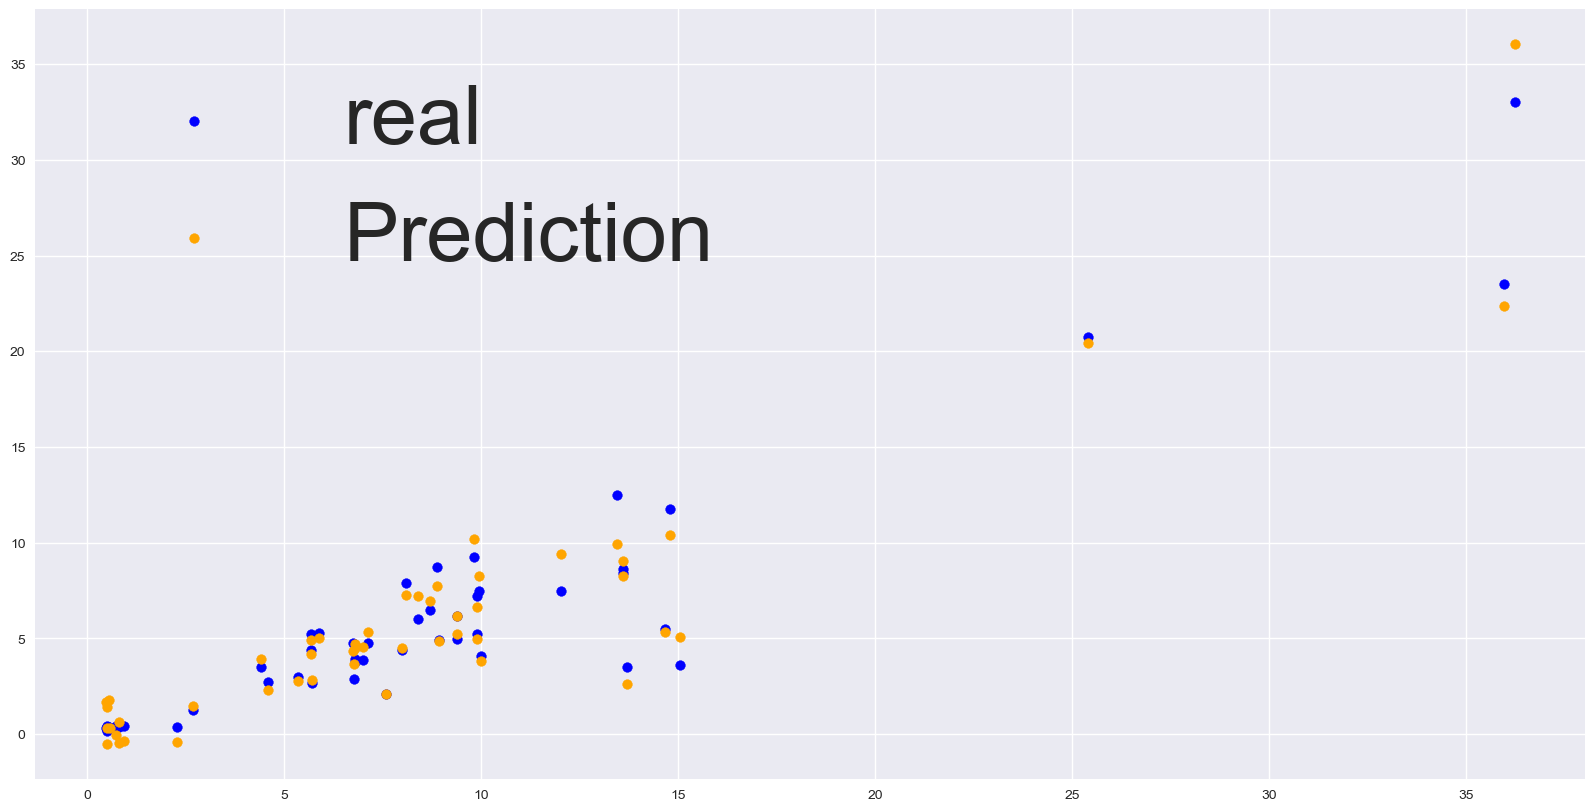

In [133]:
plt.figure(figsize=(20,10))
plt.scatter(a,b,color='blue',label='real')
plt.scatter(c,d,color='Orange',label='Prediction')
plt.legend(fontsize=60)
plt.show()

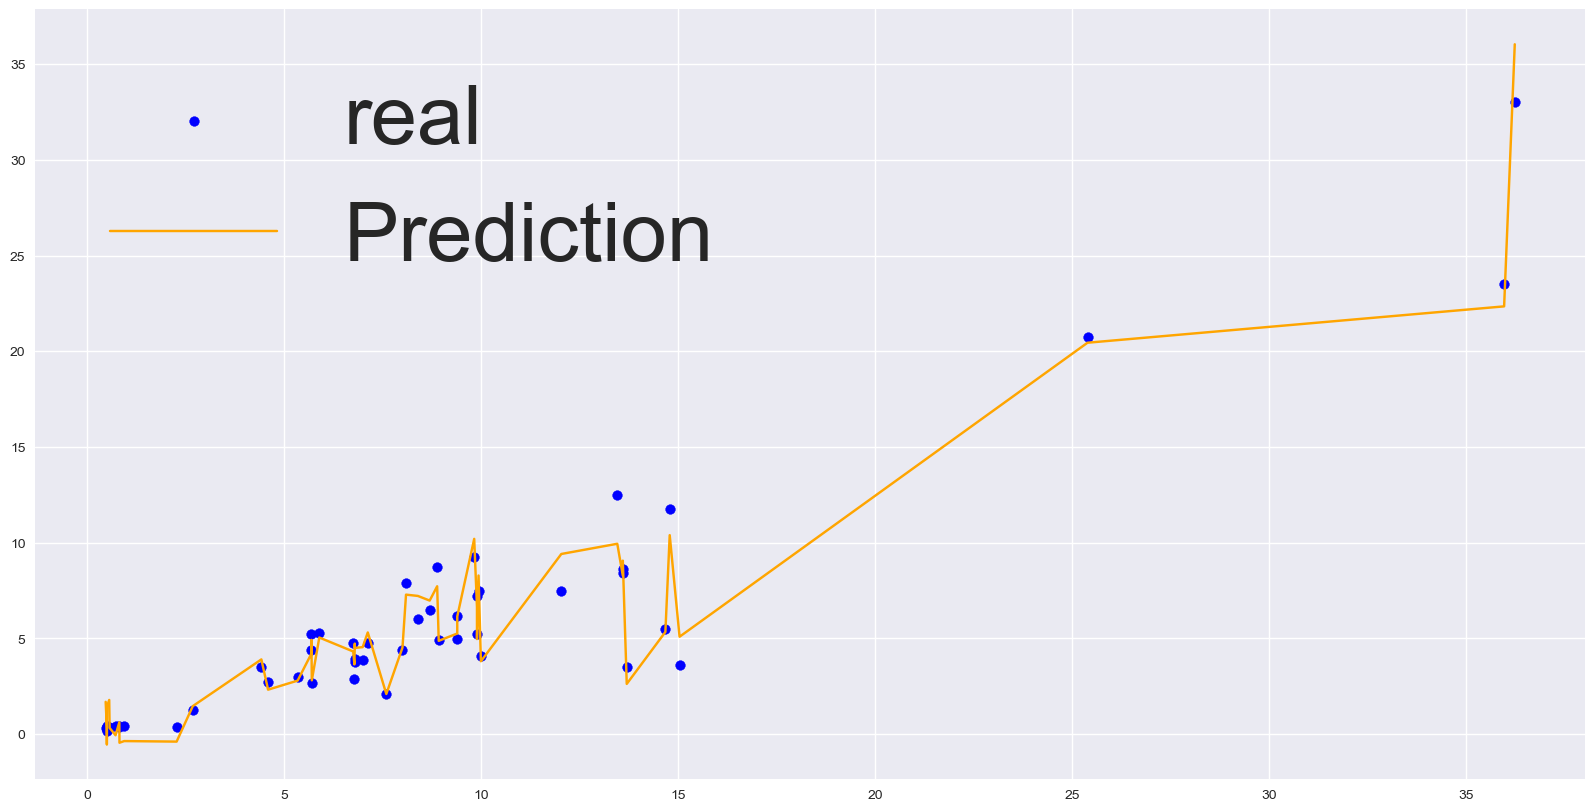

In [134]:
plt.figure(figsize=(20,10))
plt.scatter(a,b,color='blue',label='real')
plt.plot(c,d,color='Orange',label='Prediction')
plt.legend(fontsize=60)
plt.show()


# Predict of Given data
# inputs!
# Cost of this car?
# Present Price = 11.23
# KMS Driven= 42000
# Fuel Type= Petrol
# Seller Type= Dealer
# Transmission= MAnual
# Owner= 1
# Age= 10
# price= ? 

In [135]:
DataFrame.insert(0,'Target', y_new)
DataFrame.columns

Index(['Target', 'pres2_Fuel2', 'pres2_Fuel', 'pres2_kms2', 'pres2_kms',
       'pres_Fuel2', 'pres_Fuel', 'pres_kms2', 'pres_kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Age'],
      dtype='object')

# New_data

In [136]:
Present_price= 11.23
KMS_driven=42000
Fuel_type=2
Selle_type=2
Transmission=2
Owner=1
Age= 10

Model_Input= pd.DataFrame ({'Target': 10,
                           'pres2_Fuel2':[((Present_price**2)*(Fuel_type**2))],
                           'pres2_Fuel':[((Present_price**2)*(Fuel_type))],
                           'pres2_kms2':[((Present_price**2)*(KMS_driven**2))],
                           'pres2_kms':[((Present_price**2)*(KMS_driven))],
                           'pres_Fuel2':[((Present_price)*(Fuel_type**2))],
                           'pres_Fuel':[((Present_price)*(Fuel_type))],
                           'pres_kms2':[((Present_price)*(KMS_driven**2))],
                           'pres_kms':[((Present_price)*(KMS_driven))],
                           'Owner2':[Owner**2],
                           'Fuel_Type2':[Fuel_type**2],
                           'Kms_Driven2':[KMS_driven**2],
                           'Present_Price2':[Present_price**2],
                           'Present_Price':[Present_price],
                           'Kms_Driven':[KMS_driven],
                           'Fuel_Type':[Fuel_type],
                           'Seller_Type':[Selle_type],
                           'Transmission':[Transmission],
                           'Owner' :[Owner],
                           'Age':[Age]})

In [137]:
Model_Input

,Target,pres2_Fuel2,pres2_Fuel,pres2_kms2,pres2_kms,pres_Fuel2,pres_Fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,10,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [138]:
Finall = DataFrame.append(Model_Input)

In [139]:
Finall

,Target,pres2_Fuel2,pres2_Fuel,pres2_kms2,pres2_kms,pres_Fuel2,pres_Fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,4,29855296,34.8100,5.90,5464,2,2,2,0,3


In [140]:
x = Finall.drop(['Target'],axis=1)[:249]
y = Finall[['Target']][:249]
x_Finall=Finall.drop(['Target'],axis=1)[249:]

In [141]:
model.fit(x,y)

LinearRegression()

In [142]:
y_pred= model.predict(x_Finall)

In [143]:
y_pred

array([[5.2608749]])